DA623 Tutorial Assignment

Name: Madhur Vadlamudi

Roll No: 200102046

Problem Statement: Visualize filters learnt by 2D CNN for a problem of your choice.

# **Introduction**

A Convolutional Neural Network (CNN) is a type of Deep Learning neural network architecture commonly used in Computer Vision. Convolutional Neural Network consists of multiple layers like the input layer, Convolutional layer, Pooling layer, and fully connected layers.

The Convolutional layer applies ***filters*** to the input image to extract features, the Pooling layer downsamples the image to reduce computation, and the fully connected layer makes the final prediction. The network learns the optimal filters through backpropagation and gradient descent.



# **Filters in CNN**

Convolutional filters, also called kernels are designed to detect specific patterns or features in the input data by convolving the filter with the entire image.In CNNs, the weights of these filters are learned automatically through training on large datasets. For the purpose of this tutorial we will explore more about filters.

I will demonstrate how features are extracted by convolution of filter with the help of an example.

Consider two 3x3 filters given by:

X = [(-1,0,1),(-2,0,2),(1,0,1)]

Y = [(1,2,1),(0,0,0),(-1,-2,-1)]


In [35]:
import cv2
import math
import numpy as np

im = cv2.imread('lena_gray.bmp', cv2.IMREAD_GRAYSCALE)  # reading Image
print(im.size, im.shape)


rx = np.zeros_like(im) # output after convolving with filter X
ry = np.zeros_like(im) # output after convolving with filter Y
rt = np.zeros_like(im) # output after after performing an operation with rx and ry

w = im.shape[0]
h = im.shape[1]
thresh = 200

#performing convulution on the image with both filters

for i in range(1, w - 1):
    for j in range(1, h - 1):
        tl = float(im[i - 1, j - 1])
        t = float(im[i - 1, j])
        tr = float(im[i - 1, j + 1])
        l = float(im[i, j - 1])
        r = float(im[i, j + 1])
        bl = float(im[i + 1, j - 1])
        b = float(im[i + 1, j])
        br = float(im[i + 1, j + 1])

        gx = ((tl - bl) + 2 * (t - b) + (tr - br))
        gy = ((tr - tl) + 2 * (r - l) + (br - bl))
        mag = math.sqrt(gx ** 2 + gy ** 2)
        if(gx>thresh): rx[i,j] =255
        else: rx[i,j]=0
        if(gy>thresh): ry[i,j] =255
        else: ry[i,j]=0
        if(mag>thresh): rt[i,j] =255
        else: rt[i,j] = 0

262144 (512, 512)


By performing convolution with X filter we are finding Gradient of pixel values in X direction and similarly By performing convolution with Y filter we are finding Gradient of pixel values in Y direction. Threfore, as shown below pixel put high if gradient is greater than particular threshold.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
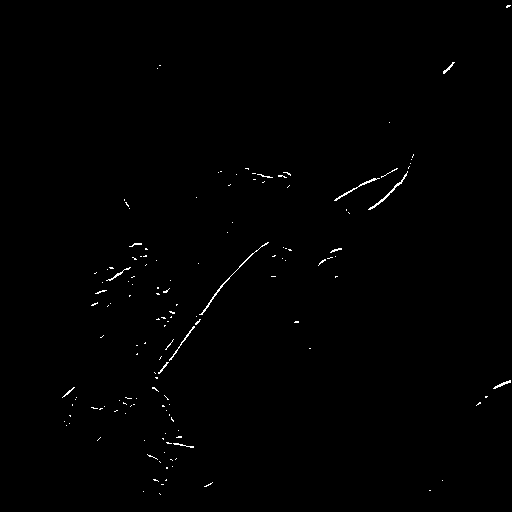

In [36]:
rx #AS we can see mostly horizontal edge features are being shown

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
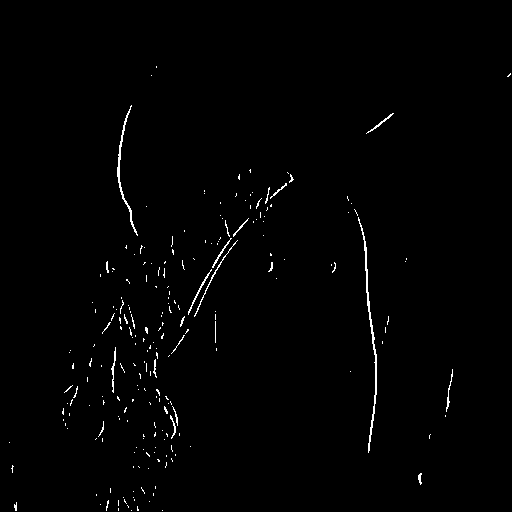

In [37]:
ry #AS we can see mostly vertial edge features are being shown

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
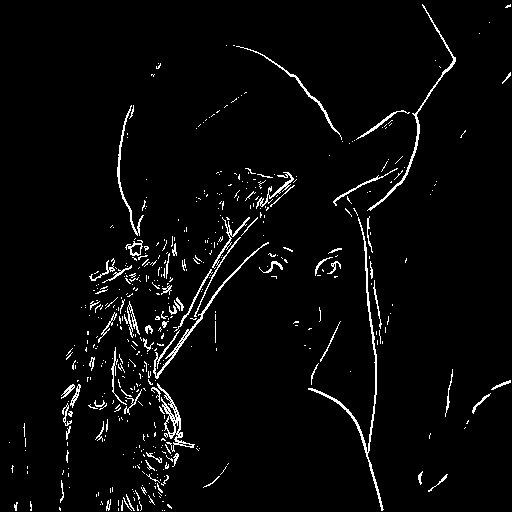

In [38]:
rt # here by taking magnitude of gradients (a simple operation in features obtained) we find edges present in images
#Infact the method described is Sobel edge detection.

In CNNs the filter/kernel values are learned automatically through training on datasets. To avoid all the work of creating a CNN and traning, we can use pre-trained CNN networks available like VGG16.

# **VGG16**
VGG-16 is renowned for its simplicity and effectiveness, as well as its ability to achieve strong performance on various computer vision tasks, including image classification and object recognition. This model achieves 92.7% top-5 test accuracy on the ImageNet dataset which contains 14 million images belonging to 1000 classes.

In [39]:
# importing model VGG16
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from matplotlib import pyplot
from keras.models import Model
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input
model = VGG16()
# Details about model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

The first six filters out of the total 64 in the block may now be listed, and each filter's three channels can be plotted. Each filter is plotted using the matplotlib library as a new row of subplots and a new column for each filter channel or depth.

A figure is produced that contains six rows of three images, one column for each channel and one row for each filter

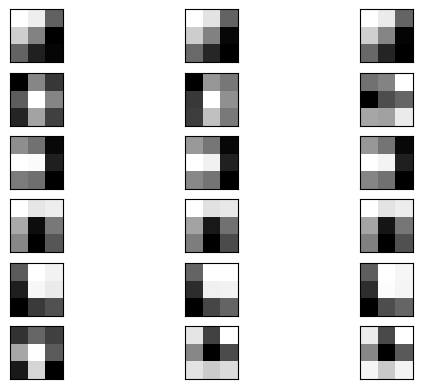

In [40]:
filters, biases = model.layers[1].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 6, 1

for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1

pyplot.show()

 A new model that generates a feature map from the first convolutional layer.By taking only the first layer ***(outputs=model.layers[1].output)*** our outcome will be a 224x224x64 feature map. All 64 two-dimensional images can be plotted as an 8 by 8 square.

1/1 [==============================] - 0s 83ms/step


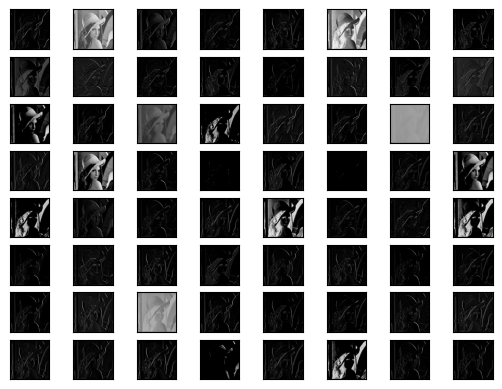

In [41]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
img = load_img('lena_gray.bmp', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

feature_maps = model.predict(img)
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
pyplot.show()

Here we can see that since the layer is only the first one, macro details are extracted, those details which are distunguishable by human eye. But more the hidden layers and more the number of filters, much finner and much micro details are extracted which cannot be directly deteced by human eye.

1/1 [==============================] - 1s 665ms/step


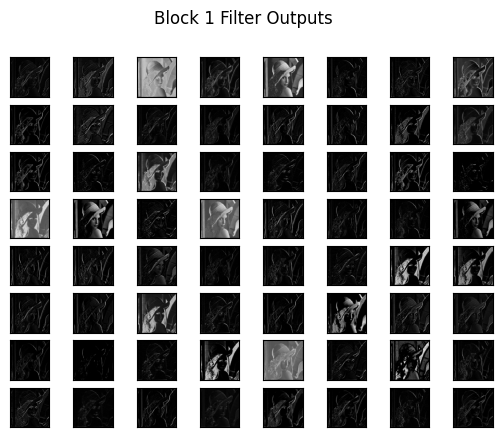

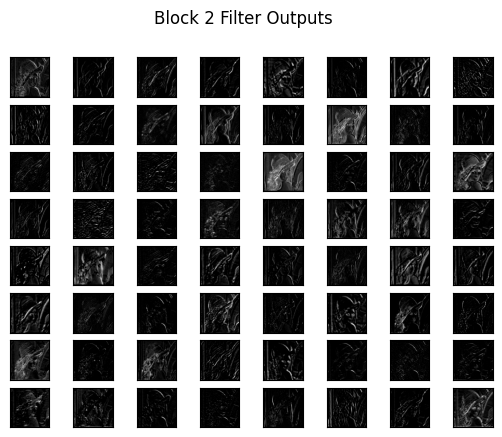

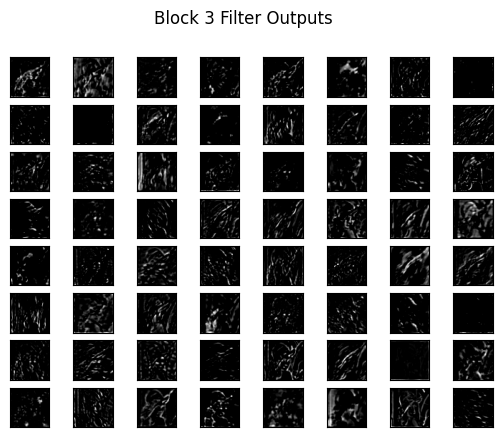

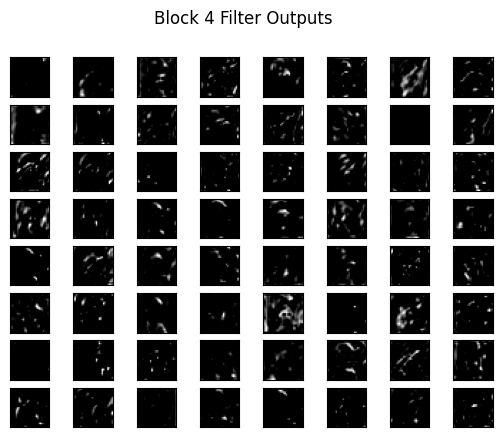

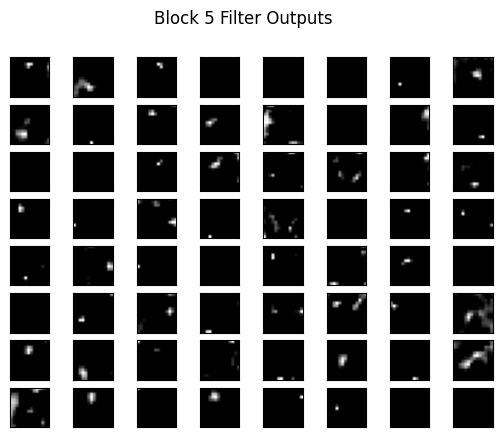

In [42]:
model = VGG16()
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
img = load_img('lena_gray.bmp', target_size=(224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

feature_maps = model.predict(img)
square = 8
block_index = 0

for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    block_index += 1

    pyplot.suptitle(f'Block {block_index} Filter Outputs')

    pyplot.show()